<a href="https://colab.research.google.com/github/lalit-kumr/credit_card_consumption/blob/main/lllllllllllCredit_card_finallllllll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps
- Import libs
- Import data
- Clean both sets
- Merge the data sets
- Split data in numerical and categorical
- Outlier removal in both sets
- fill na
- splitting in train and predict
- Label encoding
- Join dataset
- Build model OLS
- Remove features having high p value
- Apply vif
- Drop vif unwanted variables one by one
- Log of y 
- OLS model again
- RFE
- Apply linear reg model





## 0. Importing libs

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing Data

In [22]:
# behaviour = pd.read_csv('CustomerBehaviorData.csv')
# consumption = pd.read_csv('CreditConsumptionData.csv')
# customer = pd.read_csv('CustomerDemographics.csv')


behaviour = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/blob/main/CustomerBehaviorData.csv?raw=true')
consumption = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/raw/main/CreditConsumptionData.csv')
customer = pd.read_csv('https://github.com/lalit-kumr/credit_card_consumption/raw/main/CustomerDemographics.csv')

## 2. Cleaning Data

In [23]:
#finding NaN values in customer df
# customer.isna().sum()
#Droppping observations having NaN values
customer.dropna(inplace=True)
customer.isna().sum()

customer_id                     0
account_type                    0
gender                          0
age                             0
income                          0
emp_tenure_years                0
tenure_with_bank                0
region_code                     0
net_banking_flag                0
avg_days_between_transaction    0
dtype: int64

In [24]:
#Droppping observations having NaN values
behaviour.dropna(inplace=True)
behaviour.isna().sum()

customer_id              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [25]:
# checking nan cells in coonsumption
consumption.isna().sum()

customer_id          0
cc_cons_target    5000
dtype: int64

## 3.Merging the data Frames

### 3.1 Merging the dataframes

In [26]:
# - now we will merge all three dataframes on the basis of customer_id.
# - first we will merge customer and behaviour dataframes as customer_be
# - next we will merge the cosumption dataframe with the custoemr_be df and store the resultant dataframe in **final**


customer_behaviour = pd.merge(left=customer, right=behaviour, on='customer_id')
final = pd.merge(left=customer_behaviour, right=consumption, on='customer_id')

### 3.2 Merging different columns and creating new columns in their place

In [27]:
#dropping customer id
final.drop(labels='customer_id',axis=1,inplace=True)

In [28]:
#Total investments
final['investment'] = final['investment_1']+final['investment_2']+final['investment_3']+final['investment_4']

#Total debit amount
final["Total_debit_amount"]=final['debit_amount_apr']+final['debit_amount_may']+final['debit_amount_jun']

#Total Credit Amount
final["Total_credit_amount"]=final['credit_amount_apr']+final['credit_amount_may']+final['credit_amount_jun']

#Total Max Credit amount
final["Total_max_credit_acmout"]=final['max_credit_amount_apr']+final['max_credit_amount_may']+final['max_credit_amount_jun']

#Total Active Loan
final["Totat_active_loan"]= final['personal_loan_active'] + final['vehicle_loan_active']

#Toatal Closed Loan
final["Total_closed_loan"]= final['personal_loan_closed'] + final['vehicle_loan_closed']

#Credit Card expenditure total
final['creditcard_exp']= final['cc_cons_apr'] + final['cc_cons_may'] + final['cc_cons_jun'] 

#Debit Card expenditure total
final['debitcard_exp']= final['dc_cons_apr'] + final['dc_cons_may'] + final['dc_cons_jun']

#credit card use count total
final['cc_count']=final['cc_count_apr']+final['cc_count_may']+final['cc_count_jun']

# debit card use count total
final['dc_count']=final['dc_count_apr']+final['dc_count_may']+final['dc_count_jun']

#debit payments count total
final['debit_count']=final['debit_count_apr']+ final['debit_count_may']+ final['debit_count_jun']

#credit payments count total
final['credit_count']=final['credit_count_apr']+ final['credit_count_may']+ final['credit_count_jun']

In [29]:
extra = ['investment_1','investment_2','investment_3','investment_4',
         'debit_amount_apr','debit_amount_may','debit_amount_jun',
         'credit_amount_apr','credit_amount_may','credit_amount_jun',
         'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun',
         'personal_loan_active','vehicle_loan_active',
         'personal_loan_closed','vehicle_loan_closed',
         'cc_cons_apr','cc_cons_may','cc_cons_jun',
         'dc_cons_apr','dc_cons_may','dc_cons_jun',
         'cc_count_apr','cc_count_may','cc_count_jun',
         'dc_count_apr','dc_count_may','dc_count_jun',
         'debit_count_apr','debit_count_may','debit_count_jun',
         'credit_count_apr','credit_count_may','credit_count_jun'
         ]

final.drop(labels=extra,axis=1,inplace=True)
final.head(3)


,account_type,gender,age,income,emp_tenure_years,tenure_with_bank,region_code,net_banking_flag,avg_days_between_transaction,card_lim,loan_enq,emi_active,cc_cons_target,investment,Total_debit_amount,Total_credit_amount,Total_max_credit_acmout,Totat_active_loan,Total_closed_loan,creditcard_exp,debitcard_exp,cc_count,dc_count,debit_count,credit_count
0,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,519000,Y,2646.72,NaN,114544.0,231631.92,475518.75,114992.00,2,2.0,24433.29,8292.58,44.0,80,173.0,46
1,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,402000,Y,5469.79,NaN,1143923.7,210621.79,496597.52,128400.00,2,2.0,35898.73,13916.00,58.0,54,85.0,12
2,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,114000,Y,7207.85,NaN,281087.6,281651.29,110466.00,1077812.79,2,2.0,33973.99,71489.30,86.0,74,179.0,55


## 4\. Splitting data into numerical and categorical

In [30]:
#extracting categorical columns from the data
cat_cols = final.select_dtypes(include=['O'])
cat_cols.columns

Index(['account_type', 'gender', 'income', 'loan_enq'], dtype='object')

In [31]:
#extracting numerical columns from the dataset
num_cols = final.columns.difference(['account_type', 'gender', 'income', 'loan_enq'])
num_cols = final[num_cols]
num_cols.columns

Index(['Total_closed_loan', 'Total_credit_amount', 'Total_debit_amount',
       'Total_max_credit_acmout', 'Totat_active_loan', 'age',
       'avg_days_between_transaction', 'card_lim', 'cc_cons_target',
       'cc_count', 'credit_count', 'creditcard_exp', 'dc_count', 'debit_count',
       'debitcard_exp', 'emi_active', 'emp_tenure_years', 'investment',
       'net_banking_flag', 'region_code', 'tenure_with_bank'],
      dtype='object')

## 5\. Outlier removal

In [32]:
from scipy.stats import mstats

for x in num_cols:
  num_cols.loc[:,x] = mstats.winsorize(num_cols[x], limits=[0.05, 0.05])
num_cols.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Total_closed_loan,Total_credit_amount,Total_debit_amount,Total_max_credit_acmout,Totat_active_loan,age,avg_days_between_transaction,card_lim,cc_cons_target,cc_count,credit_count,creditcard_exp,dc_count,debit_count,debitcard_exp,emi_active,emp_tenure_years,investment,net_banking_flag,region_code,tenure_with_bank
count,19988.0,19988.000000,19988.000000,19988.000000,19988.0,19988.000000,19988.000000,19988.000000,14995.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,1.998800e+04,19988.000000,19988.000000,19988.000000
mean,2.0,218895.226873,194446.598967,143335.601900,2.0,43.497699,11.043776,274474.480889,55216.352984,100.574195,42.071643,43427.682636,60.753202,120.269312,20894.623887,7528.409789,13.261537,5.320343e+05,0.717881,598.841755,5.496248
std,0.0,131940.029777,116776.734081,86023.471152,0.0,12.641148,5.480507,169969.409868,97647.492383,59.345132,31.022960,29029.445793,36.560903,57.054289,15557.983145,9295.532764,10.705061,6.496300e+05,0.450042,216.308646,2.870521
min,2.0,67488.640000,62317.840000,51940.000000,2.0,28.000000,2.000000,27000.000000,1747.000000,20.000000,7.000000,10398.700000,8.000000,33.000000,4433.410000,196.960000,1.700000,4.216660e+04,0.000000,249.000000,1.000000
25%,2.0,121165.895000,108591.570000,82257.647500,2.0,33.000000,6.000000,124000.000000,6768.000000,55.000000,15.000000,21768.867500,29.000000,76.000000,9635.750000,1545.627500,5.100000,1.389297e+05,0.000000,424.000000,3.000000
50%,2.0,181415.685000,161178.650000,116607.745000,2.0,40.000000,11.000000,272000.000000,13363.000000,90.000000,36.000000,35155.390000,58.000000,114.000000,15955.500000,3934.660000,9.900000,2.734267e+05,1.000000,623.000000,6.000000
75%,2.0,276712.802500,244002.875000,175301.500000,2.0,53.000000,16.000000,401000.000000,20103.000000,134.000000,58.000000,56672.707500,87.000000,159.000000,26897.592500,9376.390000,18.000000,5.848291e+05,1.000000,799.000000,8.000000
max,2.0,566279.520000,505316.640000,382024.000000,2.0,66.000000,20.000000,576000.000000,408382.000000,247.000000,115.000000,118722.030000,132.000000,236.000000,63077.980000,36204.770000,40.000000,2.564966e+06,1.000000,937.000000,10.000000


## 6\. label encoding of cat cols

In [33]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols.drop(labels=['account_type_saving','gender_F','income_HIGH'],axis=1,inplace=True)
#renaming columns
cat_cols.columns = ['account_type','gender','income_low','income_medium', 'loan_enq']
cat_cols.head(3)

,account_type,gender,income_low,income_medium,loan_enq
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1


###  Joining cat_cols and num_cols

In [34]:
# joining the num_cols and cat_cols df 
df = pd.concat([num_cols,cat_cols],axis=1)
df.head(3)

,Total_closed_loan,Total_credit_amount,Total_debit_amount,Total_max_credit_acmout,Totat_active_loan,age,avg_days_between_transaction,card_lim,cc_cons_target,cc_count,credit_count,creditcard_exp,dc_count,debit_count,debitcard_exp,emi_active,emp_tenure_years,investment,net_banking_flag,region_code,tenure_with_bank,account_type,gender,income_low,income_medium,loan_enq
0,2.0,475518.75,231631.92,114992.0,2,63,5.0,519000,NaN,44.0,46,24433.29,80,173.0,8292.58,2646.72,30.1,114544.0,1,628.0,10,1,1,0,1,1
1,2.0,496597.52,210621.79,128400.0,2,36,12.0,402000,NaN,58.0,12,35898.73,54,85.0,13916.00,5469.79,14.4,1143923.7,0,656.0,10,1,1,0,1,1
2,2.0,110466.00,281651.29,382024.0,2,28,13.0,114000,NaN,86.0,55,33973.99,74,179.0,63077.98,7207.85,4.8,281087.6,1,314.0,10,1,0,0,1,1


## Pandas profiling

In [35]:
# import pandas_profiling

# profile_report=pandas_profiling.ProfileReport(df)
# profile_report.to_file("profile_report.html")

## Splitting the data in df_train and df_predict

In [36]:
#now we will split the df in two parts. df_predict and df_train.
#df_train will contain entries having numerial values in cc_cons_target
#df_predict will have the rows/customers that we have to predict the output for

#filtering all the rows from final that contain NaN values in cc_cons_target and storing those rows in df_predict.
df_predict = df[df.cc_cons_target.isna()]
#dropping the NaN values of cc_cons_target 
df_predict.drop(labels='cc_cons_target',axis=1,inplace=True)

# droppping  all the rows that are in the df_predict dataframe and storing the result in df_train
df_train = df.drop(df_predict.index)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_train.shape

(14995, 26)

In [38]:
df_predict.shape

(4993, 25)

## 8. Splitting df_train in train_x and train_y

In [209]:
train_x = df_train[['Total_closed_loan', 'Total_credit_amount', 'Total_debit_amount','Total_max_credit_acmout',
                    'Totat_active_loan', 'age','avg_days_between_transaction', 'card_lim','cc_count', 'credit_count',
                    'creditcard_exp', 'dc_count', 'debit_count','debitcard_exp', 'emi_active', 'emp_tenure_years', 
                    'investment','net_banking_flag', 'region_code', 'tenure_with_bank', 'account_type','gender',
                    'income_low', 'income_medium', 'loan_enq']]

train_y = df_train[['cc_cons_target']]
train_y.columns=['target']


### Normalizing target variable
our target variable should be normalized. Thus we will log transform  our train_y

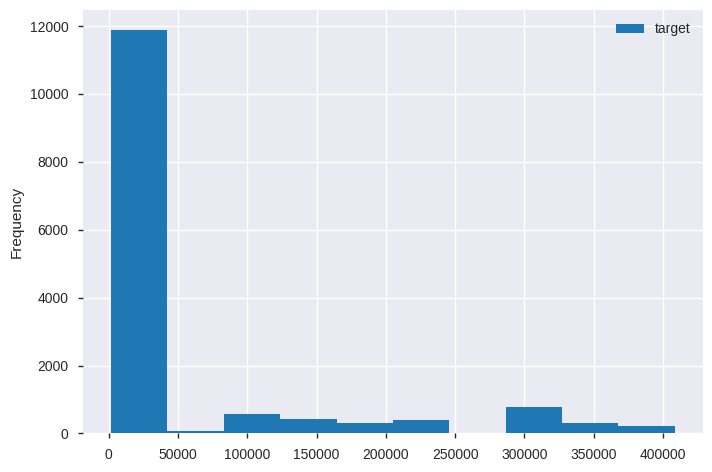

In [93]:
train_y.plot(kind='hist')

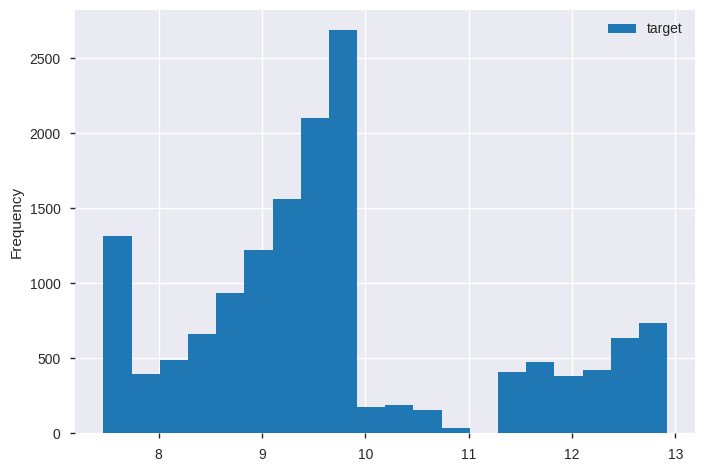

In [97]:
train_y_log = np.log(train_y)
train_y_log.plot(kind='hist',bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


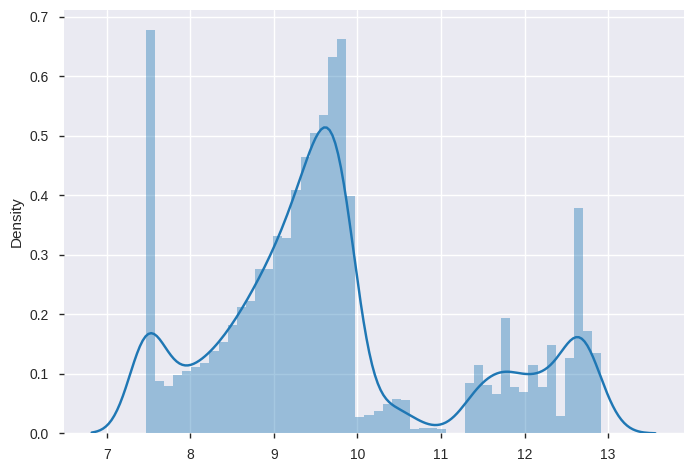

In [96]:
sns.distplot(train_y_log)

## 9\. Running OLS model on our dataset

In [61]:
### OLS regression
import statsmodels.api as sm

model = sm.OLS(train_y_log,train_x)

model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         cc_cons_target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8641
Date:                Wed, 01 Sep 2021   Prob (F-statistic):              0.645
Time:                        11:07:04   Log-Likelihood:                -27056.
No. Observations:               14995   AIC:                         5.416e+04
Df Residuals:                   14972   BIC:                         5.433e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Total_closed_loa

#### Result of OLS regression model
We can see from the above summary that many of the features have a p-value greter than that of 0.05. 

Thus we will remove those features from our model and rerun the OLS model

In [224]:
#removing the top 5 features on the basis of p_value
remove_cols = ['dc_count','Total_debit_amount','net_banking_flag','age','gender']
new_cols = train_x.columns.difference(remove_cols)
train_x = train_x[new_cols]


In [225]:
# ### OLS regression part 2
# model = sm.OLS(train_y,train_x)

# model_fit = model.fit()

# print(model_fit.summary())

In [226]:
#Total_closed_loan account_type card_lim cc_count debit_count income_low 

## VIF
- VIF is used to remove multicollinearity from the dataset. 
- VIF = 1/(1-R^2)

- It computes the R-sq value for every feature against all other features. The more a feature is collinear with other features , more the VIF score is.
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [227]:
#R^2 value is determined to find out how well an independent variable is described by the other independent variables. 
#A high value of R^2 means that the variable is highly correlated with the other variables.
#So, the closer the R^2 value to 1, the higher the value of VIF and
# the higher the multicollinearity with the particular independent variable.


# vif = 1/(1-r^2)


# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others




# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


X = train_x
calc_vif(X)



#Fixing Multicollinearity

# #Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
# X = df.drop(['Age','Salary'],axis=1)
# calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Total_closed_loan,0.000000
1,Total_credit_amount,1.000894
2,Total_max_credit_acmout,1.001745
3,Totat_active_loan,0.000000
4,account_type,1.001049
5,avg_days_between_transaction,1.001097
6,card_lim,1.000597
7,cc_count,1.000425
8,credit_count,1.001492
9,creditcard_exp,1.001631


### RFE

In [264]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE


dt_reg = DecisionTreeRegressor(random_state=0)

# lr = LinearRegression()
rfe = RFE(estimator=dt_reg, n_features_to_select=16)
rfe.fit(train_x, train_y)

rfe.ranking_


# selecting features given by RFE
f = rfe.get_support(1) #the most important features
selected_x = train_x[train_x.columns[f]] # final features`
selected_x.columns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Total_credit_amount', 'Total_max_credit_acmout',
       'avg_days_between_transaction', 'card_lim', 'cc_count', 'credit_count',
       'creditcard_exp', 'debit_count', 'debitcard_exp', 'emi_active',
       'emp_tenure_years', 'income_low', 'income_medium', 'investment',
       'region_code', 'tenure_with_bank'],
      dtype='object')

### Fitting the selected_x in OLS

In [265]:
model = sm.OLS(train_y_log,selected_x)

model_fit = model.fit()

print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          2.199e+04
Date:                Wed, 01 Sep 2021   Prob (F-statistic):                        0.00
Time:                        12:17:46   Log-Likelihood:                         -31558.
No. Observations:               14995   AIC:                                  6.315e+04
Df Residuals:                   14979   BIC:                                  6.327e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Predicting OLS regression values

In [266]:
train_y_log_hat = model_fit.predict(selected_x)
train_y_log_hat.columns = ['target']


train_y_hat = np.exp(train_y_log_hat)
train_y_hat = pd.DataFrame(train_y_hat)
# train_y_hat = train_y_hat.apply(lambda x: '%.5f' % x, axis=1)
# train_y_hat = pd.DataFrame(train_y_hat)
train_y_hat.columns = ['target']

### calculating errors

In [267]:
#UDF for calcualting MAPE,RMSE and RMSPE for the test values and forecasted values
def calculate_error(y_true,y_pred):
  map_error = np.mean((np.abs(y_true - y_pred))/y_true*100)
  rms_error = np.sqrt(np.mean(np.square(y_true - y_pred)))
  rmps_error = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
  result =  {'mape':map_error ,'rmse': rms_error ,'rmspe': rmps_error}
  return result

In [268]:
# calling the udf to calculate error between actual test values and arima forecasts
error_coff = calculate_error(train_y.target,train_y_hat.target)
print('------------OLS model error----------------------')
# print('MAPE  :',error_coff['mape'][0])
# print('RMSE  :',error_coff['rmse'][0])
# print('RMSPE :',error_coff['rmspe'][0])
print(error_coff)
print('-------------------------------------------------')



------------OLS model error----------------------
{'mape': 389.3668488890094, 'rmse': 117760.38706191342, 'rmspe': 1534.6068953333556}
-------------------------------------------------


In [270]:
np.mean(np.abs(train_y.target - train_y_hat.target))

61933.28297991663

### polynomila reg

In [271]:
# from sklearn.preprocessing import PolynomialFeatures
# polynomial_features= PolynomialFeatures(degree=3)
# xp = polynomial_features.fit_transform(selected_x)
# xp.shape


In [272]:
# model = sm.OLS(train_y_log, xp).fit()
# ypred = np.exp(model.predict(xp))
# model.summary()


## Train test split

In [279]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(selected_x, train_y, test_size=0.25, random_state=72)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

## Linear Regression

In [284]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# training the linear regression model on x_train and y_train_log
lr.fit(x_train ,y_train_log)

# predicting the values of selected_x and storing them in y_train_predicted
y_train_predicted = np.exp(lr.predict(x_train))


## Error calculation of train values

In [286]:
# calling the udf to calculate error between train_y_ln and predicted values
error_coff = calculate_error(y_train_predicted,y_train)
print('------------OLS model error----------------------')
print('MAPE  :',error_coff['mape'][0])
print('RMSE  :',error_coff['rmse'][0])
print('RMSPE :',error_coff['rmspe'][0])
# print(error_coff)
print('-------------------------------------------------')

------------OLS model error----------------------
MAPE  : 293.055988010995
RMSE  : 104706.6434714322
RMSPE : 634.2497966057269
-------------------------------------------------


## Prediction test values

In [287]:
y_test_predicted = np.exp(lr.predict(x_test))

## Error Calculation of test values

In [288]:
# calling the udf to calculate error between train_y_ln and predicted values
error_coff = calculate_error(y_test_predicted,y_test)
print('------------OLS model error----------------------')
print('MAPE  :',error_coff['mape'][0])
print('RMSE  :',error_coff['rmse'][0])
print('RMSPE :',error_coff['rmspe'][0])
# print(error_coff)
print('-------------------------------------------------')

------------OLS model error----------------------
MAPE  : 302.99339127312254
RMSE  : 105915.31068053312
RMSPE : 647.5363731243311
-------------------------------------------------


## Predicting the values for the df_predict cstomers

In [292]:
#selecting the best features
df_predict_selected_x = df_predict[df_predict.columns[f]] # final features`
df_predict_selected_x.columns


#prediciting the consumption values
customer_predict = np.exp(lr.predict(df_predict_selected_x))
customer_predict

array([[2.18779108e+02],
       [6.72940936e-13],
       [4.75985934e-59],
       ...,
       [1.53667722e-38],
       [5.42519500e-56],
       [8.34627270e-28]])